In [2]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import warnings 
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv(r'C:\Users\MY PC\OneDrive\Desktop\Datasets\crop_production.csv')

In [5]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [6]:
data.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [7]:
data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [8]:
data.dropna(subset=["Production"], axis=0, inplace=True)

In [9]:
data.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

<AxesSubplot:>

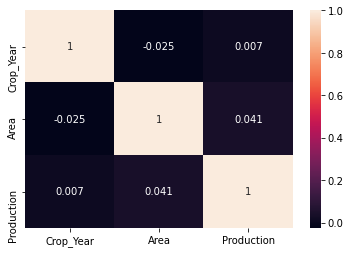

In [10]:
plt.tick_params(labelsize=10)
sns.heatmap(data.corr(),annot=True)

In [11]:
data.State_Name.nunique()

33

In [12]:
data.State_Name.value_counts()

Uttar Pradesh                  33189
Madhya Pradesh                 22604
Karnataka                      21079
Bihar                          18874
Assam                          14622
Odisha                         13524
Tamil Nadu                     13266
Maharashtra                    12496
Rajasthan                      12066
Chhattisgarh                   10368
West Bengal                     9597
Andhra Pradesh                  9561
Gujarat                         8365
Telangana                       5591
Uttarakhand                     4825
Haryana                         4540
Kerala                          4003
Nagaland                        3904
Punjab                          3143
Meghalaya                       2867
Arunachal Pradesh               2545
Himachal Pradesh                2456
Jammu and Kashmir               1632
Tripura                         1412
Manipur                         1266
Jharkhand                       1266
Mizoram                          954
P

In [13]:
data.District_Name.nunique()

646

In [14]:
print("Unique values are:", data.Crop_Year.nunique())
print("Min value:",data.Crop_Year.min())
print("Max value:", data.Crop_Year.max())
print("Finding total value count:", data.Crop_Year.value_counts())

Unique values are: 19
Min value: 1997
Max value: 2015
Finding total value count: 2003    17139
2002    16536
2007    14269
2008    14230
2006    13976
2004    13858
2010    13793
2011    13791
2009    13767
2000    13553
2005    13519
2013    13475
2001    13293
2012    13184
1999    12441
1998    11262
2014    10815
1997     8899
2015      561
Name: Crop_Year, dtype: int64


In [15]:
print(data.Area.nunique())
print(data.Area.max())
print(data.Area.value_counts().head(10))
print(data.Area.value_counts().tail(10))

38391
8580100.0
1.0      3573
2.0      3140
100.0    2621
3.0      2478
4.0      2182
5.0      2090
6.0      1750
200.0    1671
10.0     1590
7.0      1555
Name: Area, dtype: int64
145910.0    1
12241.0     1
108061.0    1
33175.0     1
163778.0    1
46657.0     1
14312.0     1
21138.0     1
24474.0     1
61597.0     1
Name: Area, dtype: int64


{'whiskers': [<matplotlib.lines.Line2D at 0x20c261b5a90>,
 'caps': [<matplotlib.lines.Line2D at 0x20c261c5190>,
 'boxes': [<matplotlib.lines.Line2D at 0x20c261b5730>],
 'medians': [<matplotlib.lines.Line2D at 0x20c261c5850>],
 'fliers': [<matplotlib.lines.Line2D at 0x20c261c5bb0>],
 'means': []}

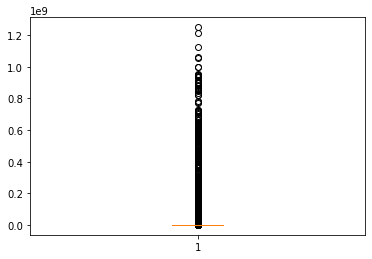

In [16]:
plt.boxplot(data.Production)

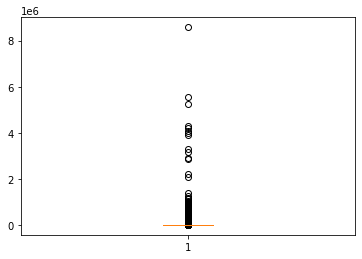

In [17]:
plt.boxplot(data.Area);

In [18]:
Prod_by_state = data.groupby(by = data.State_Name)['Production','State_Name'].sum().reset_index().sort_values(by = 'Production', ascending = False).head(10)
Prod_by_state

,State_Name,Production
15,Kerala,9.788005e+10
1,Andhra Pradesh,1.732459e+10
27,Tamil Nadu,1.207644e+10
30,Uttar Pradesh,3.234493e+09
3,Assam,2.111752e+09
32,West Bengal,1.397904e+09
17,Maharashtra,1.263641e+09
14,Karnataka,8.634298e+08
0,Andaman and Nicobar Islands,7.182232e+08
24,Punjab,5.863850e+08


In [20]:
north_india = ['Jammu and Kashmir', 'Himachal Pradesh', 'Uttar Pradesh', 'Chandigarh']
south_india = ['Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu', 'Telangana']
north_east_india = ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']

In [21]:
def get_zonal_names(row):
    if row['State_Name'].strip() in north_india:
        val = 'North Zone'
    elif row['State_Name'].strip()  in south_india:
        val = 'South Zone'
    elif row['State_Name'].strip()  in north_east_india:
        val = 'NE Zone'
    else:
        val = 'No Value'
    return val

data['Zones'] = data.apply(get_zonal_names, axis=1)
data['Zones'].unique()

array(['No Value', 'South Zone', 'NE Zone', 'North Zone'], dtype=object)

In [22]:
data.Zones.value_counts()

No Value      123211
South Zone     53500
North Zone     37366
NE Zone        28284
Name: Zones, dtype: int64

In [23]:
crop=data['Crop']
def cat_crop(crop):
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        if crop==i:
            return 'Fruits'
    for i in ['Tobacco','Coffee','Tea','Sugarcane','Rubber']:
        if crop==i:
            return 'Commercial'

data['cat_crop']=data['Crop'].apply(cat_crop)

In [24]:
data["cat_crop"].value_counts()

Commercial    10561
Fruits         6153
Name: cat_crop, dtype: int64

In [25]:
data_explore = data.copy()

<AxesSubplot:xlabel='Production', ylabel='State_Name'>

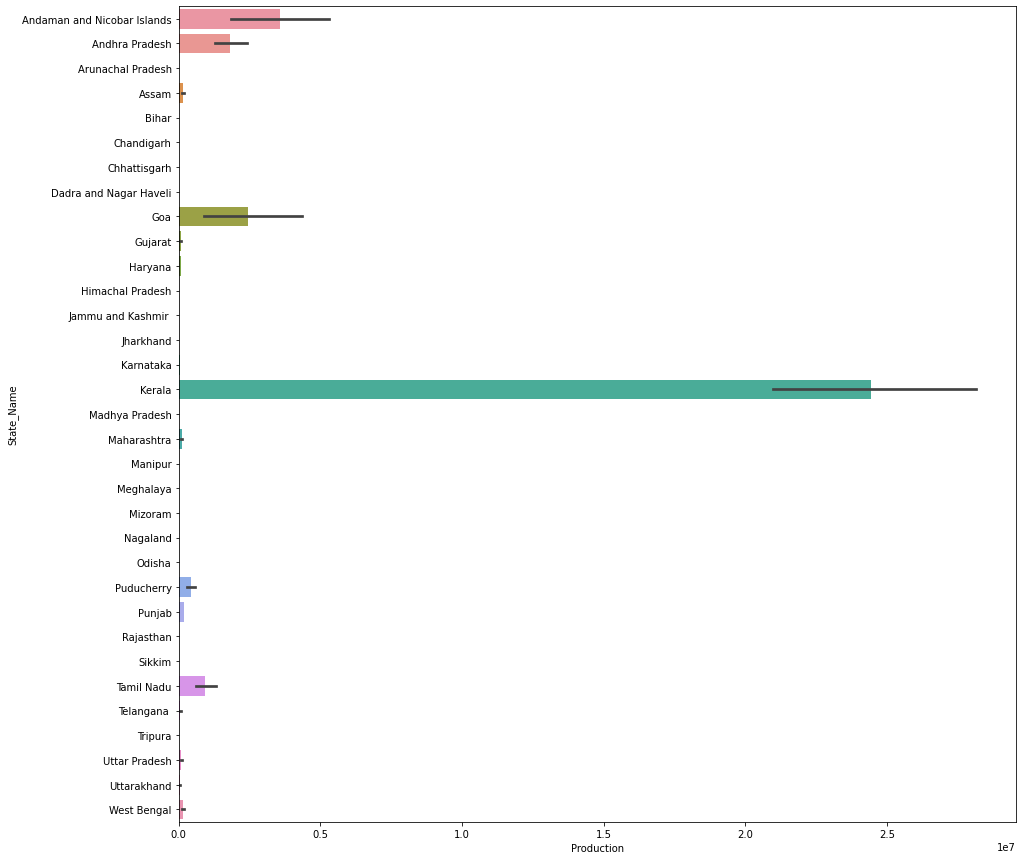

In [34]:
plt.figure(figsize= (15,15))
sns.barplot(x=data['Production'],y= data["State_Name"], orient='h')

<AxesSubplot:xlabel='Crop_Year'>

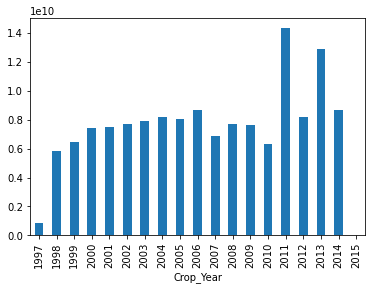

In [29]:
plt.tick_params(labelsize=10)
data_explore.groupby("Crop_Year")["Production"].agg("sum").plot.bar()

Text(0.5, 1.0, 'Zone-Wise Production: Total')

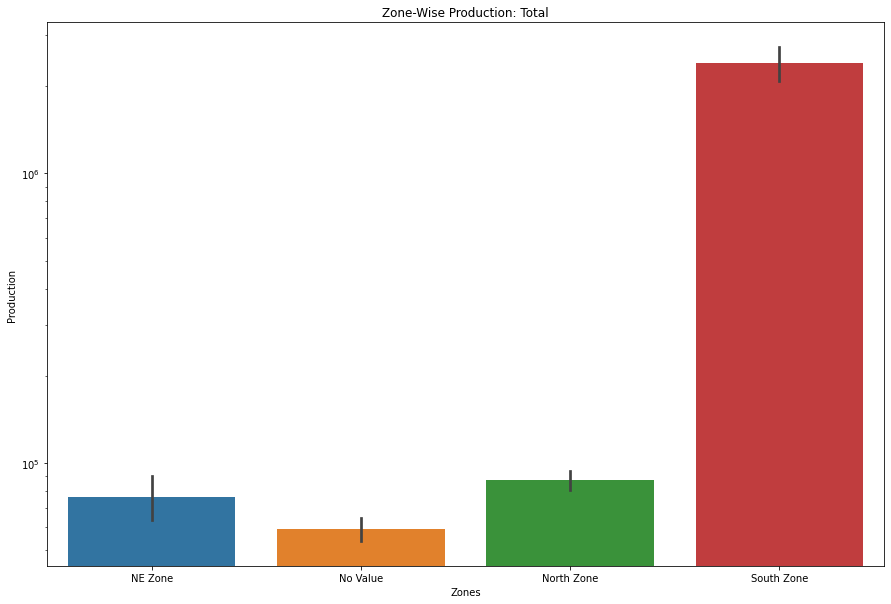

In [26]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(data_explore.Zones.sort_values(ascending=True), data_explore.Production)
plt.yscale('log')
plt.title('Zone-Wise Production: Total')

Text(0.5, 1.0, 'Southern-Zone Production')

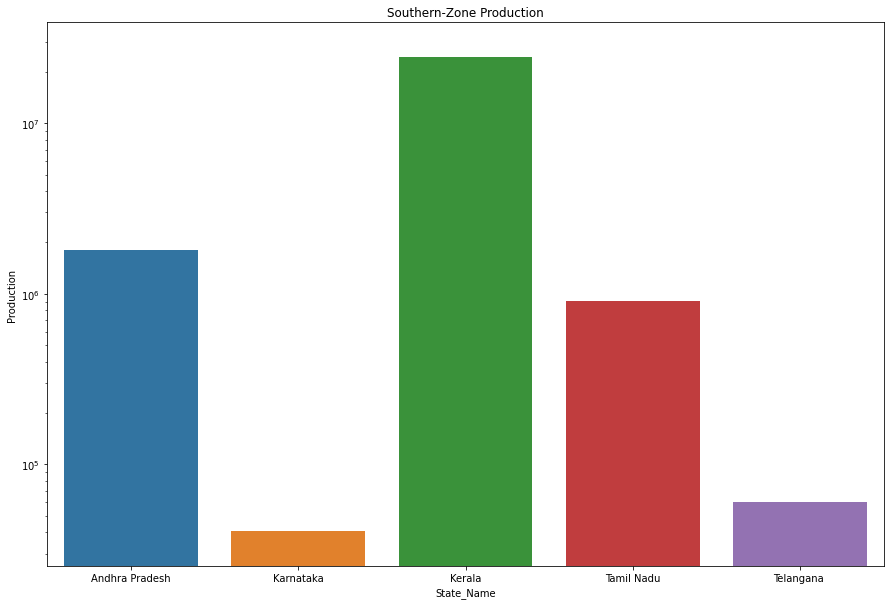

In [27]:
south_zone =  data_explore[(data_explore["Zones"] == 'South Zone')]
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(south_zone.State_Name, south_zone.Production,errwidth=0)
plt.yscale('log')
plt.title('Southern-Zone Production')